# Øving 4
## Oppgave 1
En bil masse masse $m=1500 \textrm{ kg}$ kjører på horisontalt underlag med fart $v_0=80 \textrm{ km/h}$ idet den bråbremser for en hindring. Bilen har blokkeringsfrie bremser slik at det hele tiden virker maksimal hvilkefriksjon mot dekkene. Hvilefriksjonstallet mellom dekk og underlag er $\mu_s=0,80$. 

a) Hvor lang strekning trenger bilen for å stoppe, målt fra punktet der nedbremsingen startet? 
b) Hvor stor fart ville bilen ha truffet hindringen med, dersom den hadde kjørt i 90 km/h?
c) Ved en annen anledning kjører bilen nedover en bakke med 15 % stigning. Hvor lang strekning trenger bilen for å stoppe i dette tilfellet?


## Oppgave 2

Kula i et flipperspill skytes ut fra en fjærbelastet avtrekker. Spilleren trekker i fjæra slik at den presses sammen en avstand $x=7,0 \textrm{ cm}$. Se figuren under.

<center><img src="figurer/pinball_fjær.png" alt="" style="width: 400px;"/></center>

Hvor stor må fjærkonstanten $k$ til fjæra være dersom kula akkurat skal nå toppen av flipperspillet, som ligger en avstand $s=78 \textrm{ cm}$ fra punktet der kula forlater fjæra (i punktet der fjæra er slapp).



## Oppgave 3
En vogn i en berg-og-dalbane starter i en viss høyde $h$ over det laveste punktet A i en sirkulær loop med radius $R$. To andre punkter i loopen er markerte: B er midtveis oppe, og C er det høyeste punktet. Se figuren under.

<center><img src="figurer/oppgave_sirkelbevegelse_vogn_loop.png" alt="" style="width: 400px;"/></center>

I denne oppgaven skal vi se bort fra friksjon og luftmotstand.

a) Fra hvilken høyde $h$ over punkt A må vogna slippes for at den skal kunne fullføre en hel loop uten å miste kontakten med underlaget?

b) Hva er normalkrafta på vogna i det høyeste punktet i loopen dersom den slippes fra en starthøyde $h=3R$?


## Oppgave 4
energibevaring tesla

In [1]:
#Rutiner for simulering av vertikalt fall med luftmotstand

import numpy as np
import matplotlib.pyplot as plt

# Globale konstanter
m=70 #Legemets masse i kg
g=9.81 #Tyngdeakselerasjonen i m/s^2

def drag(A,C,v):
    "Funksjonen drag beregner luftmotstanden f=kv^2, der k = 0.5*rho*C*A"
    rho=1.28 # Massetetthet luft i kg/m**3 
    k=0.5*rho*A*C #Koeffisienten k i f=kv^2
    return k*v**2

def dXdt(X):
   """Funksjonen dXdt beregner høyresiden f(X) i differensiallikningssystemet; dX/dt=f(X).
   Input:
   X:  X=[y,v] en vektor som inneholder posisjon y og (vertikal) fart v. Med positiv retning nedover er v > 0 og y < 0 
   for et legeme som faller vertikalt mot bakken.
   
   Output:
   [dydt,dvdt]: Array med nye verdier for hastighet (dydt) og akselerasjon (dvdt)
   """
   y , v =X        #Koordinater y og v hentes fra inndatavektor X
   f=drag(A,C,v)   #Luftmotstand i N
   dydt=v          #Sammenhengen mellom 
   dvdt=-f/m+g     #Akselerasjonen, fra Newtons 2. lov
   return np.array([dydt,dvdt])

def euler(t0,y0,v0,dt):
    """Funksjon som bruker Eulers metode til å løse et system av differensiallikninger dX/dt = f(X), der X =[y,v] er
    en vektor som inneholder posisjons- og hastighetsvariable. 
    Input: 
    t0: Starttid [s]
    y0: Startverdi for y [m]
    v0: Vertikal startfart [m/s]
    dt: Tidssteg [s]

    Output:
    t_liste: array med t-verdier,[t0,...tn]
    y_liste: array med y-verdier, [y0,...,yn]
    v_liste: array med v-verdier, [v0,...,vn]
    """

    X0=np.array([y0,v0]) #X0 er en vektor med posisjon og fart ved t=t0
    t_liste=[0.0]# Liste med t-verdier
    y_liste=[y0]# liste med y-verdier
    v_liste=[v0] # liste med v-verdier
    X=X0  # initierer loop
    t=t0
    y=y0
    while y<=0: #Loop kjøres inntil legemet treffer bakken; med pos. retning nedover er y0 < 0
        Xn=X+dt*dXdt(X) #Beregner neste steg i Euler-metoden
        y=Xn[0]
        v=Xn[1] # henter elementene
        t_liste.append(t) # t-verdi legges til liste
        y_liste.append(y)# y-verdi legges til liste
        v_liste.append(v)# v-verdi legges til liste
        t=t+dt
        X=Xn
    return t_liste,y_liste,v_liste

En Tesla Model S har følgende data:

Masse: $m=2250 \textrm{ kg}$
Drag-koeffisient: $C= 0.24$
Frontareal $A=2,33 \textrm{  m}^2$

Beregn arbeidet gjort av luftmotstanden på bilen dersom den kjører en strekning på $10 \textrm{ km}$ en konstant fart på

i) $v=80 \textrm{ km/h}$ \
ii) $v=100 \textrm{ km/h}$

Angi svaret i $\textrm{kWh}$.

b) Vi skal nå anta at bilen akselererer fra 0 opp til den konstante farten i a) i løpet av en tid $T$; bilen holder deretter konstant fart i et tidsrom $\Delta t$, og bremser så ned igjen til 0 i løpet av samme tid $T$. Farten $v(t)$ kan da modelleres slik: 

   $$ v(t)=   \left\{
\begin{array}{ll}
      \frac{v_{\text{max}}}{2} \left(\sin(\frac{2\pi t}{T}-\frac{\pi}{2}) +1 \right) & 0<t<T \\
      v_{\text{max}} & T<t<T+\Delta t \\
      \frac{v_{\text{max}}}{2} \left(-\sin(\frac{2\pi (t-(T+\Delta t))}{T}-\frac{\pi}{2}) +1 \right) & T+\Delta t<t<2T+\Delta t \\
\end{array} 
\right.  $$

Lag et plott av $v(t)$ dersom $T=10 \textrm{ s}$, $\Delta t=100 \textrm{ s}$ og hhv.

i) $v_{\text{max}}=80 \textrm{ km/h}$ \
ii) $v_{\text{max}}=100 \textrm{ km/h}$.

c) Beregn hvor langt bilen har beveget seg fra start til slutt for

i) $v_{\text{max}}=80 \textrm{ km/h}$ \
ii) $v_{\text{max}}=100 \textrm{ km/h}$.

d) Beregn arbeidet som luftmotstanden har gjort på bilen fra start til slutt når farten $v(t)$ er gitt ved formelen i b). Hint: Arbeidet $W$ gjort av luftmotstanden $f=\frac{1}{2} \rho A C_d v^2$ kan finnes fra definisjonen av effekt, $P=dW/dt$, og sammenhengen $P=fv$, slik at $W= \int_{t_1}^{t_2} P dt$.

(11333.333335413356, 3.587412530670655e-05)
0.5307222225166033


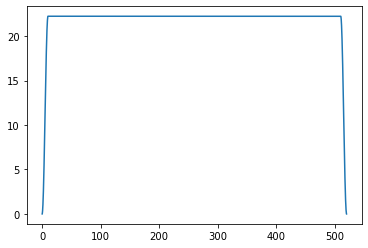

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def v(t,T,delta_t,vmax):
    """Funksjonen gir farten v(t) gitt ved den delte funksjonsforskriften angitt i oppgaveteksten.

    Input:
    t: tid [s]
    T: Akselerasjons- og nedbremsingstid [s]
    delta_t: Varighet av tidsrom med konstant fart vmax [s]
    vmax: Den maksimale farten bilen akselererer opp til [km/h]

    Output:
    v: fart v(t) [m/s]
    """

    
    if(t>0 and t<=T):
        v=0.5*(vmax/3.6)*(np.sin(np.pi*t/T-np.pi/2)+1)
       
    elif (t>T and t<=T+delta_t):
        v=vmax/3.6
       
    elif (t>T+delta_t and t<=2*T+delta_t):
        v=0.5*(vmax/3.6)*(-np.sin(np.pi*(t-(T+delta_t))/T-np.pi/2)+1)
       
    else:
        v=0
        
    return v

def P(t,A,C,T,delta_t,vmax):
    rho=1.23
    P=0.5*rho*A*C*v(t,T,delta_t,vmax)**3
    return P

T=10
delta_t=500
vmax=80
t1=0
t2=2*T+delta_t
A=2.33
C=0.24

t_liste=np.arange(0.1,2*T+delta_t,0.1)
#t=200
#print(v(t,T,delta_t,vmax))
v_liste=[]
for t in t_liste:
    #print(t)
    v_liste.append(v(t,T,delta_t,vmax))
plt.plot(t_liste,v_liste)
#print(v_liste)

s=integrate.quad(v,t1,t2,args=(T,delta_t,vmax))

W=integrate.quad(P,t1,t2,args=(A,C,T,delta_t,vmax))
print(s)
print(W[0]/(3.6*10**6))


print(" a)")
# Hvis bilen kjører med farten 80 km/h
d=10000
b) Anta nå at bilen skal akselerer fra 0 til henholdsvis 80 og 100 km/h. En modell for farten de
første 10 sekundene er da
𝑣𝑣(𝑡𝑡) = 𝑣𝑣𝑚𝑚𝑎𝑎𝑎𝑎
2 �sin �
𝜋𝜋
5 𝑡𝑡 − 𝑝𝑝𝑝𝑝
2 � + 1�
Plot v som funksjon av t for begge tilfellene, de første 10 sekundene.
def v(t,vmax):
 v=0.5*vmax*1000/3600 *(np.sin((np.pi/10)*t-np.pi/2)+1)
 return v
c) Hvor langt kjører bilen de første 10 sekundene i begge tilfeller? Her må vi integrere opp
numerisk ds = v ∙ dt over de 10 første sekundene.
Her kan vi integrere med integrate.quad(v, 0, 10 , args=80) for å finne integralet fra 0 til
10 s gitt vmax=80.
result_80,err = integrate.quad(v, 0, 10,args=80)
result_100,err = integrate.quad(v, 0, 10,args=100)
d) Hvor stor kinetisk energi har bilen i begge tilfeller når den har nådd maksfarten? Oppgi verdiene
i kWh
e) Hvor stort arbeid har friksjon gjort i akselerasjonsfasen de første 10 sekundene?
Her må vi ta utgangspunkt i 𝑑𝑑𝑊𝑊 = 𝐹𝐹 ⋅ 𝑑𝑑𝑑𝑑 = 𝐹𝐹 ⋅ 𝑣𝑣 ⋅ 𝑑𝑑𝑡𝑡
𝑊𝑊 = �
10
0
1
2 𝐶𝐶𝜌𝜌𝐴𝐴 𝑣𝑣2 ⋅ 𝑣𝑣 ⋅ 𝑑𝑑𝑑𝑑
 Her må vi intergrer over en funksjon som vi kan kalle drag_effekt
def drag_effekt(t,vmax):
 return 0.5*A*rho*C*v(t,vmax)**3
f) Hvor stort arbeid har friksjonskraften gjort fra A til B gitt at bilen bremser med samme fart
tid profil som den akselerer i starten
g) Hvis det stemmer det tesla nå hevder at de har klart å få C=0.21. Hva blir effekttapet til bilen
da? 